In [1]:
import pandas as pd
from Code.Load import Loaded_Data_v2 as ld
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

warnings.filterwarnings('ignore')
import random
import seaborn as sns
from sktime.split import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

C:\Users\jsime\OneDrive\School Documents\Graduate\Spring Quarter 2024\TS_Forecasting_Credit_Markets\TS_Forecasting\Final_Project\Code\Load\Loaded_Data_v2.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined['inverse_sizerank'] = 1 / filtered_combined['sizerank']
C:\Users\jsime\OneDrive\School Documents\Graduate\Spring Quarter 2024\TS_Forecasting_Credit_Markets\TS_Forecasting\Final_Project\Code\Load\Loaded_Data_v2.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_combined['inver

      region       date  w_new construction sales count  \
0    Midwest 2018-03-31                    12082.313315   
1    Midwest 2018-04-30                    13163.086629   
2    Midwest 2018-05-31                    14303.497230   
3    Midwest 2018-06-30                    14972.297595   
4    Midwest 2018-07-31                    15543.400245   
..       ...        ...                             ...   
287     West 2023-11-30                     8019.569574   
288     West 2023-12-31                     7542.981412   
289     West 2024-01-31                     7106.110341   
290     West 2024-02-29                     6947.687137   
291     West 2024-03-31                     7362.514024   

     w_new construction mean sales price ($)  w_mean price cut ($)  \
0                               4.064101e+05          10538.410409   
1                               4.605180e+05          10953.848964   
2                               4.708800e+05          11251.988743   
3          

Importing plotly failed. Interactive plots will not work.


In [2]:
ld.regional_grouped_data

,region,date,w_new construction sales count,w_new construction mean sales price ($),w_mean price cut ($),w_mean days to pending,w_mean price cut (%),w_median sales price ($),w_mean sales price ($),w_percent sold above list (%),w_zillow home value index,w_zillow observed rent index,Population,w_PCPI,MORTGAGE30US,UMCSENT
0,Midwest,2018-03-31,12082.313315,4.064101e+05,10538.410409,52.052799,0.036359,169720.672511,214909.413629,0.193328,177917.042559,1158.106957,68282.287000,50734.507055,4.4675,98.8
1,Midwest,2018-04-30,13163.086629,4.605180e+05,10953.848964,46.659460,0.035415,174924.090647,216956.793549,0.223797,179069.593324,1161.130432,68288.709667,50870.816130,4.5860,98.0
2,Midwest,2018-05-31,14303.497230,4.708800e+05,11251.988743,41.784847,0.034718,180567.276454,221728.396186,0.256569,180050.664394,1161.447113,68295.132333,51007.127406,4.5700,98.2
3,Midwest,2018-06-30,14972.297595,4.494060e+05,11314.173614,39.344523,0.034203,186045.884185,228385.708537,0.277426,180559.091498,1164.915058,68301.555000,51143.440884,4.5275,97.9
4,Midwest,2018-07-31,15543.400245,4.417524e+05,11156.103439,39.189459,0.034224,188284.757964,230886.550933,0.279945,181081.408745,1167.620911,68307.977667,51279.756562,4.5500,96.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,West,2022-08-31,11208.192986,1.339130e+06,39243.904002,26.274381,0.037712,681054.710026,853524.899987,0.475217,722972.461519,2325.079119,78851.038667,73319.024110,6.1120,58.6
228,West,2022-09-30,11360.191915,1.326951e+06,36886.907615,31.836967,0.036386,667081.443379,834104.611750,0.381116,700496.291310,2329.133220,78862.480250,73598.624379,6.9000,59.9
229,West,2022-10-31,11108.923026,1.340645e+06,36423.384805,36.651533,0.035881,659426.795421,825012.638395,0.323425,707996.611497,2331.012486,78873.921833,73878.221654,6.8050,56.7
230,West,2022-11-30,10445.967318,1.257429e+06,36331.386946,40.871661,0.035924,650854.904059,816643.441122,0.293027,702691.058671,2332.224444,78885.363417,74157.815934,6.3640,59.8


In [4]:
ld.combined_data

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),mean sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index
date,,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN
2000-01-31,394443,530,"Carlsbad, NM",msa,West,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,395099,717,"Sikeston, MO",msa,Midwest,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,395100,835,"Silver City, NM",msa,West,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394442,321,"Carbondale, IL",msa,Midwest,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395203,710,"Warren, PA",msa,Northeast,PA,73.0,NaN,117.0,NaN,NaN,NaN,NaN,NaN,134351.108235,NaN
2024-03-31,394572,184,"Erie, PA",msa,Northeast,PA,362.0,NaN,40.0,12801.320664,0.051420,NaN,NaN,NaN,189451.659940,1033.261905
2024-03-31,394917,282,"Niles, MI",msa,Midwest,MI,401.0,NaN,47.0,13661.322766,0.033906,NaN,NaN,NaN,246418.614547,1441.932540


In [2]:
regional_weighted_data = ld.regional_grouped_data
regional_weighted_data

w_new construction sales count  \
region  date                                         
Midwest 2018-03-31                    12082.313315   
        2018-04-30                    13163.086629   
        2018-05-31                    14303.497230   
        2018-06-30                    14972.297595   
        2018-07-31                    15543.400245   
...                                            ...   
West    2023-11-30                     8019.569574   
        2023-12-31                     7542.981412   
        2024-01-31                     7106.110341   
        2024-02-29                     6947.687137   
        2024-03-31                     7362.514024   

                    w_new construction mean sales price ($)  \
region  date                                                  
Midwest 2018-03-31                             4.064101e+05   
        2018-04-30                             4.605180e+05   
        2018-05-31                             4.708800e+05   
        2018-06-30                             4.494060e+05   
        2018-07-31                             4.417524e+05   
...                                                     ...   
West    2023-11-30                             1.230770e+06   
        2023-12-31                             1.241760e+06   
        2024-01-31                             1.276511e+06   
        2024-02-29                             1.229617e+06   
        2024-03-31                                      NaN   

                    w_mean price cut ($)  w_mean days to pending  \
region  date                                                       
Midwest 2018-03-31          10538.410409               52.052799   
        2018-04-30          10953.848964               46.659460   
        2018-05-31          11251.988743               41.784847   
        2018-06-30          11314.173614               39.344523   
        2018-07-31          11156.103439               39.189459   
...                                  ...                     ...   
West    2023-11-30          41432.086320               36.983560   
        2023-12-31          38923.711411               41.689306   
        2024-01-31          38385.421655               46.330427   
        2024-02-29          39346.241002               46.983066   
        2024-03-31          40780.849874               42.697526   

                    w_mean price cut (%)  w_median sales price ($)  \
region  date                                                         
Midwest 2018-03-31              0.036359             169720.672511   
        2018-04-30              0.035415             174924.090647   
        2018-05-31              0.034718             180567.276454   
        2018-06-30              0.034203             186045.884185   
        2018-07-31              0.034224             188284.757964   
...                                  ...                       ...   
West    2023-11-30              0.033968             681466.854889   
        2023-12-31              0.033381             674415.302363   
        2024-01-31              0.032830             664389.341977   
        2024-02-29              0.032650             665549.689080   
        2024-03-31              0.032629                       NaN   

                    w_mean sales price ($)  w_percent sold above list (%)  \
region  date                                                                
Midwest 2018-03-31           214909.413629                       0.193328   
        2018-04-30           216956.793549                       0.223797   
        2018-05-31           221728.396186                       0.256569   
        2018-06-30           228385.708537                       0.277426   
        2018-07-31           230886.550933                       0.279945   
...                                    ...                            ...   
West    2023-11-30           860236.005612                       0.390576   
        

In [3]:
combined = ld.combined_data
combined

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),mean sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index
date,,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN
2000-01-31,394443,530,"Carlsbad, NM",msa,West,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,395099,717,"Sikeston, MO",msa,Midwest,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,395100,835,"Silver City, NM",msa,West,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-31,394442,321,"Carbondale, IL",msa,Midwest,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395203,710,"Warren, PA",msa,Northeast,PA,73.0,NaN,117.0,NaN,NaN,NaN,NaN,NaN,134351.108235,NaN
2024-03-31,394572,184,"Erie, PA",msa,Northeast,PA,362.0,NaN,40.0,12801.320664,0.051420,NaN,NaN,NaN,189451.659940,1033.261905
2024-03-31,394917,282,"Niles, MI",msa,Midwest,MI,401.0,NaN,47.0,13661.322766,0.033906,NaN,NaN,NaN,246418.614547,1441.932540


<Axes: ylabel='date'>

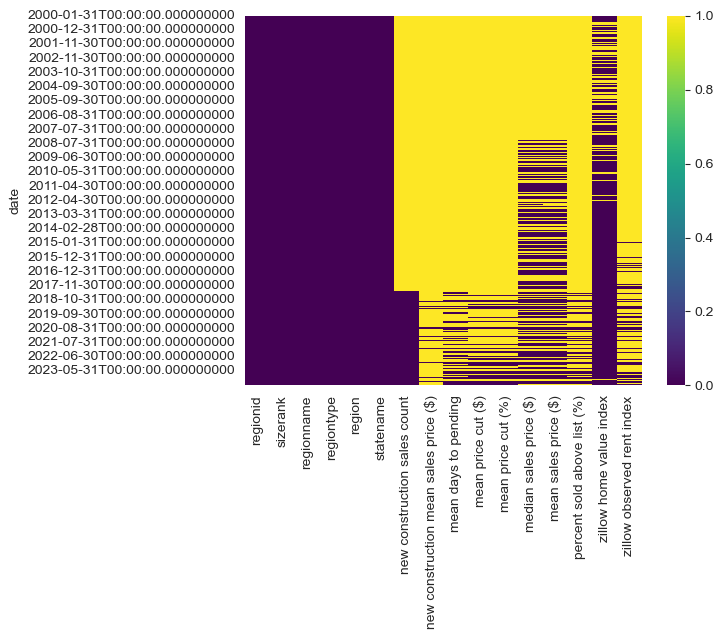

In [4]:
sns.heatmap(ld.combined_data.isnull(), cbar=True, cmap='viridis')

In [5]:
new_con_sales_price = ld.new_construction_mean_sales_price
new_con_sales_price

,regionid,sizerank,regionname,regiontype,statename,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,4.144814e+05,3.965338e+05,4.085005e+05,4.056592e+05,4.240465e+05,...,5.340700e+05,5.433041e+05,5.377370e+05,5.435401e+05,5.441634e+05,5.528314e+05,5.398009e+05,5.482996e+05,5.418011e+05,5.340584e+05
1,394913,1,"New York, NY",msa,NY,8.180735e+05,8.395916e+05,8.536231e+05,8.901915e+05,8.855233e+05,...,1.159706e+06,1.275895e+06,1.150620e+06,1.245319e+06,1.131144e+06,1.178282e+06,1.236628e+06,1.188113e+06,1.074010e+06,1.190906e+06
2,753899,2,"Los Angeles, CA",msa,CA,1.308642e+06,1.176748e+06,1.380173e+06,1.316500e+06,1.452454e+06,...,1.902235e+06,2.003955e+06,1.869173e+06,2.000229e+06,2.162873e+06,2.011191e+06,1.793027e+06,1.795323e+06,2.004975e+06,1.784561e+06
3,394463,3,"Chicago, IL",msa,IL,5.878497e+05,5.627078e+05,4.910892e+05,6.110676e+05,6.169371e+05,...,6.214410e+05,6.107898e+05,6.100394e+05,5.712161e+05,5.894585e+05,5.811009e+05,6.624802e+05,6.232083e+05,6.188757e+05,6.224019e+05
4,394514,4,"Dallas, TX",msa,TX,3.634632e+05,3.817313e+05,3.877844e+05,3.774744e+05,4.058407e+05,...,5.085527e+05,5.104667e+05,5.069385e+05,5.180489e+05,5.222101e+05,5.005329e+05,5.074470e+05,5.066434e+05,4.907940e+05,4.786487e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,395063,522,"Sanford, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.218508e+05,3.251404e+05,3.419151e+05
168,394309,526,"Albemarle, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.699845e+05
169,845162,535,"Granbury, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.204578e+05
170,395122,576,"St. Marys, GA",msa,GA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.970484e+05,4.140215e+05,3.485341e+05,3.752479e+05,3.913863e+05,3.968337e+05,4.107808e+05


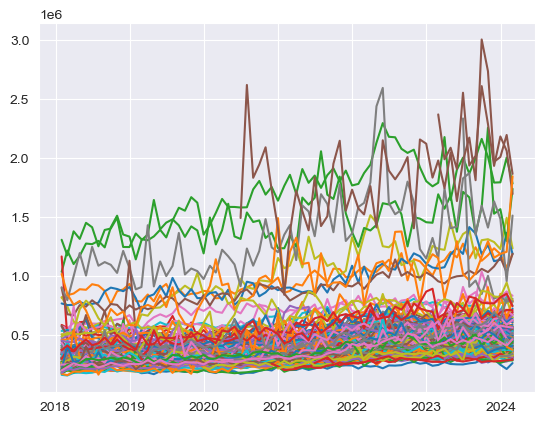

In [6]:
cities = ld.new_construction_mean_sales_price['regionname'].unique().tolist()
for city in cities:
    plt.plot(combined[combined['regionname'] == city]['new construction mean sales price ($)'], label=city)
plt.show()

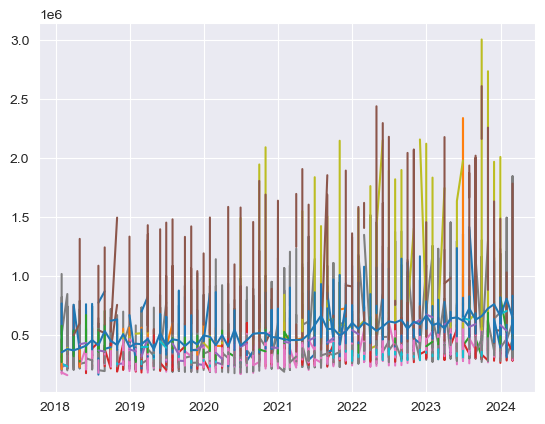

In [7]:
states = combined['statename'].unique().tolist()
for state in states:
    plt.plot(combined[combined['statename'] == state]['new construction mean sales price ($)'], label=state)
plt.show()

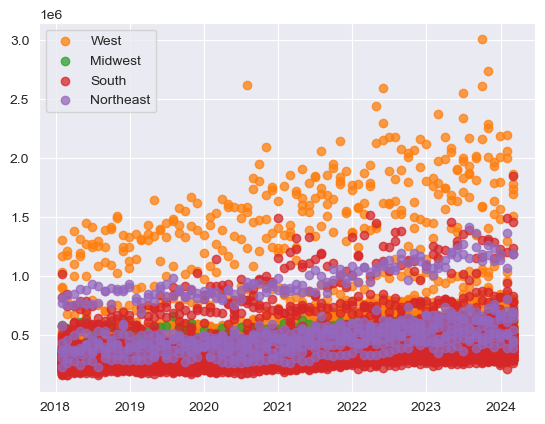

In [8]:
regions = combined['region'].unique().tolist()
for region in regions:
    plt.scatter(combined[combined['region'] == region].index,
                combined[combined['region'] == region]['new construction mean sales price ($)'], label=region,
                alpha=0.75)
plt.legend()
plt.show()

In [9]:
combined.describe()

,regionid,sizerank,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),mean sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index
count,264115.000000,264115.000000,6.655300e+04,1.002400e+04,35970.000000,29001.000000,29068.000000,1.097100e+05,1.091910e+05,31023.000000,2.111790e+05,35889.000000
mean,417296.870772,463.372936,2.510082e+03,4.634309e+05,48.751626,16875.925128,0.040531,1.906284e+05,2.375208e+05,0.292654,1.760417e+05,1282.439618
std,90386.441220,269.140301,4.069910e+04,2.588003e+05,25.687137,13351.685650,0.010321,1.199198e+05,1.641302e+05,0.152387,1.165423e+05,601.771206
min,102001.000000,0.000000,4.000000e+00,1.599555e+05,7.000000,2884.733622,0.014182,3.850000e+04,5.253600e+04,0.000000,2.796741e+04,472.376387
25%,394549.000000,231.000000,1.520000e+02,3.220068e+05,29.000000,9894.904447,0.033005,1.195000e+05,1.420625e+05,0.174069,1.073233e+05,957.366409
50%,394802.000000,462.000000,3.180000e+02,3.984149e+05,44.000000,12897.923375,0.039182,1.567290e+05,1.893820e+05,0.263307,1.431134e+05,1162.028328
75%,395055.000000,693.000000,7.800000e+02,5.124273e+05,63.000000,18109.406077,0.046802,2.201670e+05,2.695820e+05,0.386173,2.038013e+05,1439.660291
max,845172.000000,939.000000,1.733387e+06,3.004595e+06,258.000000,156702.285078,0.157683,1.530000e+06,1.975777e+06,0.858032,1.671601e+06,13377.712333


In [10]:
combined['datecol'] = combined.index
combined

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),mean sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index,datecol
date,,,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN,2000-01-31
2000-01-31,394443,530,"Carlsbad, NM",msa,West,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-31
2000-01-31,395099,717,"Sikeston, MO",msa,Midwest,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-31
2000-01-31,395100,835,"Silver City, NM",msa,West,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-31
2000-01-31,394442,321,"Carbondale, IL",msa,Midwest,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395203,710,"Warren, PA",msa,Northeast,PA,73.0,NaN,117.0,NaN,NaN,NaN,NaN,NaN,134351.108235,NaN,2024-03-31
2024-03-31,394572,184,"Erie, PA",msa,Northeast,PA,362.0,NaN,40.0,12801.320664,0.051420,NaN,NaN,NaN,189451.659940,1033.261905,2024-03-31
2024-03-31,394917,282,"Niles, MI",msa,Midwest,MI,401.0,NaN,47.0,13661.322766,0.033906,NaN,NaN,NaN,246418.614547,1441.932540,2024-03-31


In [22]:
grouped_new_con = combined[['region', 'datecol', 'new construction mean sales price ($)','mean sales price ($)']].dropna().groupby(
    by=['region', 'datecol']).mean()
grouped_new_con = grouped_new_con.reset_index()
grouped_new_con

,region,datecol,new construction mean sales price ($),mean sales price ($)
0,Midwest,2018-01-31,329799.577658,217076.428571
1,Midwest,2018-02-28,330201.046762,213551.153846
2,Midwest,2018-03-31,329798.658201,216171.714286
3,Midwest,2018-04-30,337395.488087,219663.857143
4,Midwest,2018-05-31,347662.763194,224085.285714
...,...,...,...,...
291,West,2023-10-31,868162.916962,691090.636364
292,West,2023-11-30,782149.709942,688303.939394
293,West,2023-12-31,809007.235843,683397.575758
294,West,2024-01-31,773261.579264,664239.028571


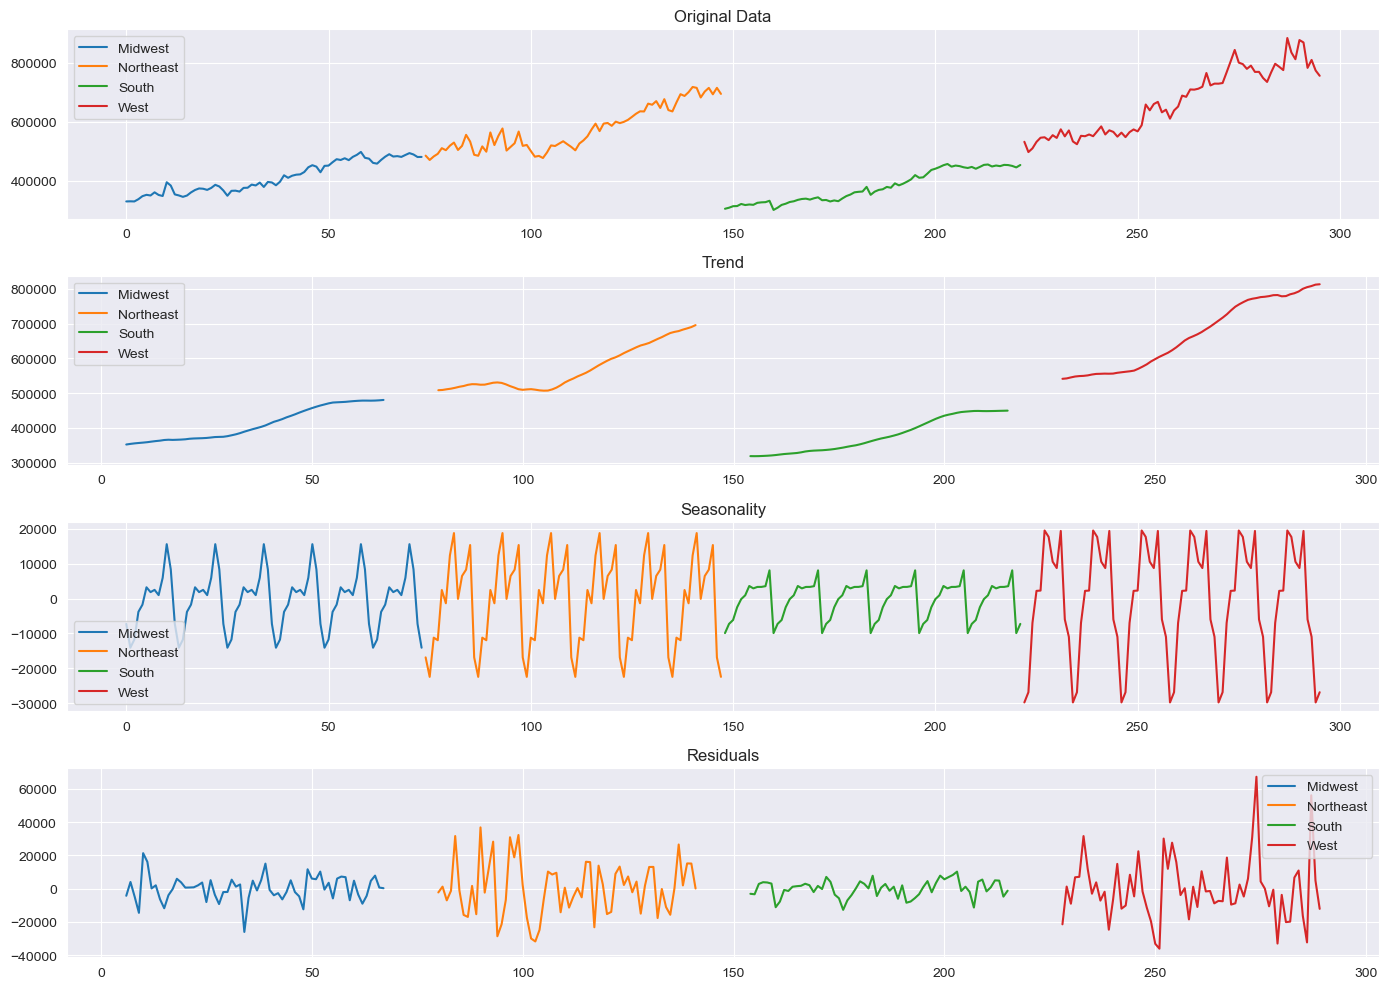

In [23]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(411)
ax1.set_title('Original Data')
ax2 = plt.subplot(412)
ax2.set_title('Trend')
ax3 = plt.subplot(413)
ax3.set_title('Seasonality')
ax4 = plt.subplot(414)
ax4.set_title('Residuals')
for region in grouped_new_con['region'].unique():
    region_data = grouped_new_con[grouped_new_con['region'] == region]
    decomposition = sm.tsa.seasonal_decompose(region_data['new construction mean sales price ($)'], model='additive',
                                              period=12)
    ax1.plot(region_data['new construction mean sales price ($)'], label=region)
    ax2.plot(decomposition.trend.index, decomposition.trend, label=region)
    ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label=region)
    ax4.plot(decomposition.resid.index, decomposition.resid, label=region)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

plt.tight_layout()
plt.show()

In [24]:
def plot_acf_pacf_for_dataframe(dataframe, lags=40):
    """
    Plots ACF and PACF for each column in the dataframe.
    
    Parameters:
    - dataframe: The dataframe with time series data in each column.
    - lags: Number of lags to include in the plots.
    """

    acf_pacf_data = {}
    print(dataframe.columns)
    for column in dataframe:
        time_series = dataframe[column]

        acf_data = acf(time_series, nlags=lags)
        pacf_data = pacf(time_series, nlags=lags, method='ywm')
        acf_pacf_data[column] = (acf_data, pacf_data)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        plot_acf(time_series, lags=lags, ax=ax1)
        ax1.set_title(f'{column} - Autocorrelation Function')

        plot_pacf(time_series, lags=lags, method='ywm', ax=ax2)
        ax2.set_title(f'{column} - Partial Autocorrelation Function')

        plt.show()

    return acf_pacf_data

In [25]:
def run_stationarity_tests(dataframe, KPSS_TREND=True):
    results = []
    if KPSS_TREND:
        kp_r = 'ct'
    else:
        kp_r = 'c'
    for col in dataframe.columns:
        ts = dataframe[col]
        adf_test = adfuller(ts, autolag='AIC')
        adf_output = {
            'Test': 'ADF', 'Variable': col,
            'Test Statistic': adf_test[0],
            'p-value': adf_test[1],
            'Used Lag': adf_test[2],
            'Number of Observations': adf_test[3],
        }
        adf_output.update({f'Critical Value ({key})': value for key, value in adf_test[4].items()})
        results.append(adf_output)
        kpss_test = kpss(ts, regression=kp_r, nlags='auto')
        kpss_output = {
            'Test': 'KPSS', 'Variable': col,
            'Test Statistic': kpss_test[0],
            'p-value': kpss_test[1],
            'Used Lag': kpss_test[2],
        }
        kpss_output.update({f'Critical Value ({key})': value for key, value in kpss_test[3].items()})
        results.append(kpss_output)

    results_df = pd.DataFrame(results)

    print(
        "ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.")
    print(
        "KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).")

    return results_df

MIDWEST
Index(['new construction mean sales price ($)'], dtype='object')


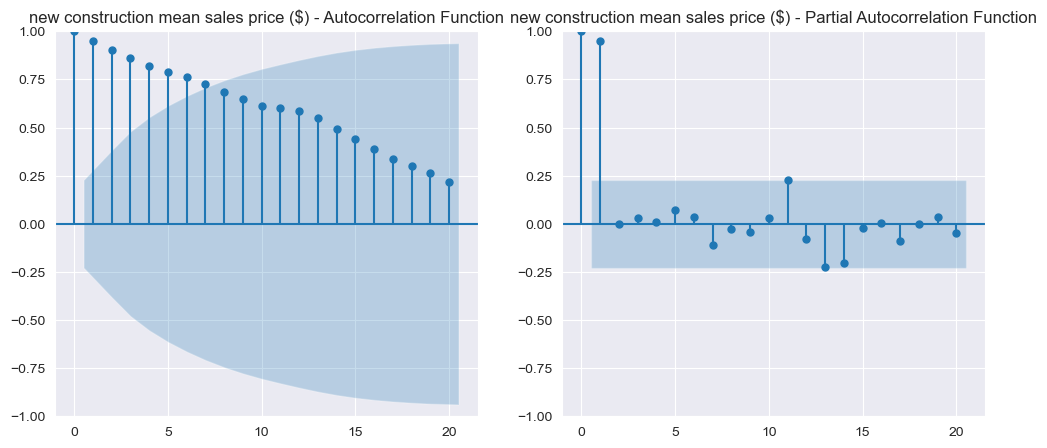

NORTHEAST
Index(['new construction mean sales price ($)'], dtype='object')


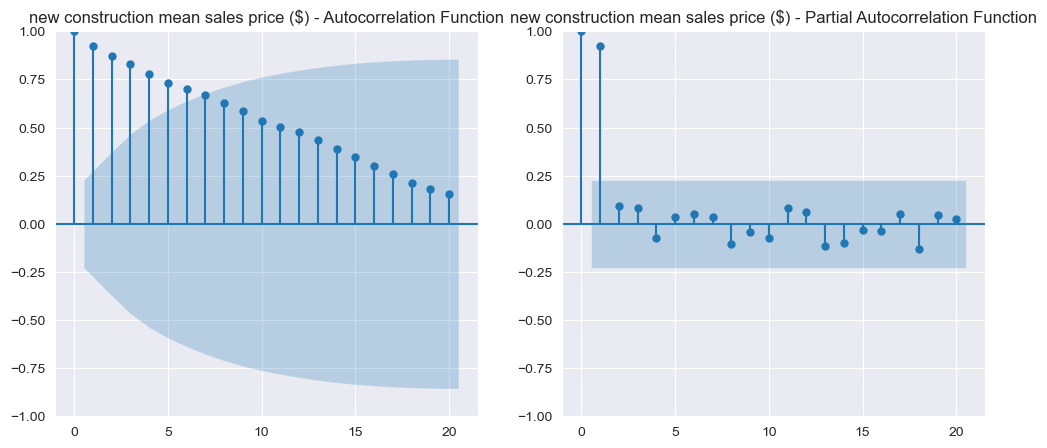

SOUTH
Index(['new construction mean sales price ($)'], dtype='object')


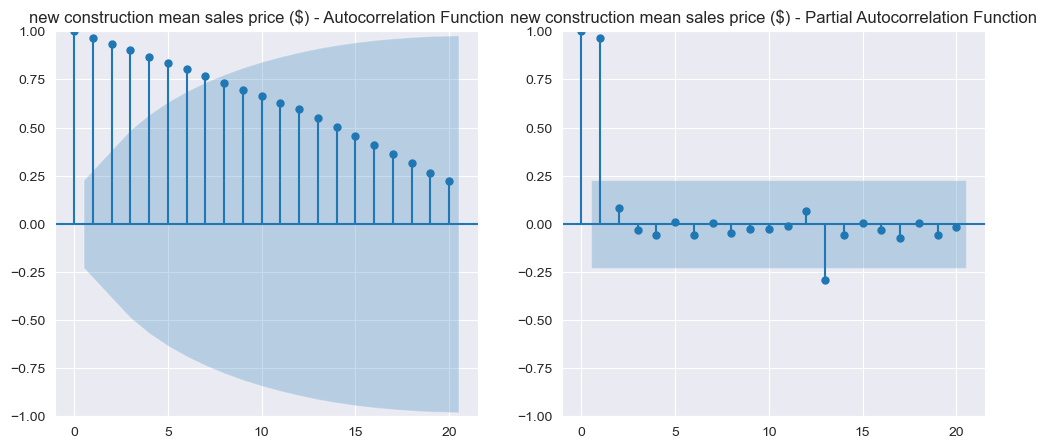

WEST
Index(['new construction mean sales price ($)'], dtype='object')


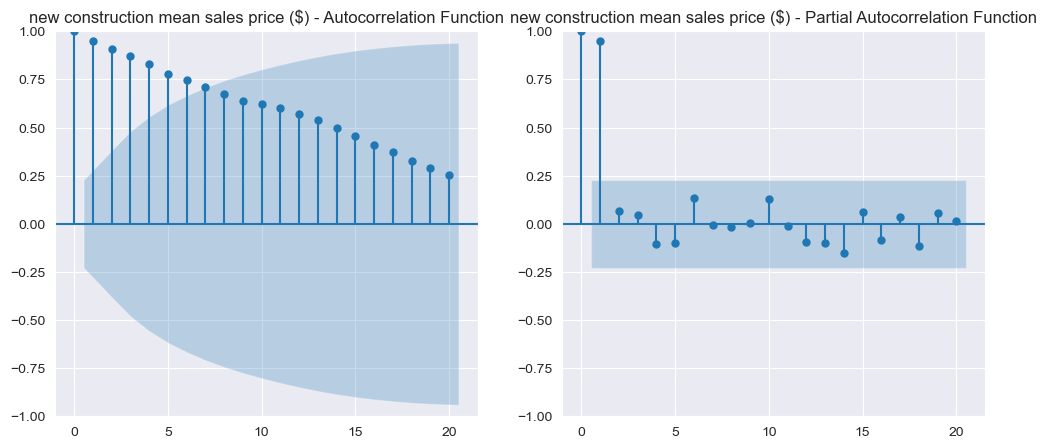

In [26]:
for region in grouped_new_con['region'].unique():
    print(str.upper(region))
    plot_acf_pacf_for_dataframe(
        pd.DataFrame(grouped_new_con[grouped_new_con['region'] == region]['new construction mean sales price ($)']),
        lags=20)

In [27]:
for region in grouped_new_con['region'].unique():
    print(str.upper(region))
    print(run_stationarity_tests(
        pd.DataFrame(grouped_new_con[grouped_new_con['region'] == region]['new construction mean sales price ($)'])))

MIDWEST
ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
   Test                               Variable  Test Statistic   p-value  \
0   ADF  new construction mean sales price ($)       -1.105814  0.712748   
1  KPSS  new construction mean sales price ($)        0.181860  0.022803   

   Used Lag  Number of Observations  Critical Value (1%)  Critical Value (5%)  \
0         0                    73.0            -3.523284            -2.902031   
1         4                     NaN             0.216000             0.146000   

   Critical Value (10%)  Critical Value (2.5%)  
0             -2.588371                    NaN  
1              0.119000                  0.176  
NORTHEAST
ADF Test Assumptions: The data has an autoregressive structure a

In [28]:

grouped_combined = combined[['region', 'datecol', 'new construction mean sales price ($)', 'median sales price ($)',
                             'new construction sales count', 'mean price cut ($)']].dropna().groupby(
    by=['region', 'datecol']).mean()
grouped_combined = grouped_combined.reset_index()
grouped_combined

,region,datecol,new construction mean sales price ($),median sales price ($),new construction sales count,mean price cut ($)
0,Midwest,2018-03-31,329798.658201,175880.500000,9117.142857,10270.619654
1,Midwest,2018-04-30,337395.488087,180857.142857,9838.285714,10624.085221
2,Midwest,2018-05-31,347662.763194,186123.714286,10740.428571,10961.517141
3,Midwest,2018-06-30,352199.334552,191458.214286,11381.714286,11082.711747
4,Midwest,2018-07-31,349907.659401,193891.714286,11921.571429,10989.246709
...,...,...,...,...,...,...
283,West,2023-10-31,868162.916962,570381.454545,3987.303030,28908.675053
284,West,2023-11-30,782149.709942,568974.666667,3916.121212,27226.211022
285,West,2023-12-31,809007.235843,562362.333333,3665.333333,25175.129652
286,West,2024-01-31,773261.579264,547828.657143,3270.828571,24044.204686


In [29]:
weighted_regional = ld.regional_grouped_data
weighted_regional = weighted_regional.reset_index()
weighted_regional

,region,date,w_new construction sales count,w_new construction mean sales price ($),w_mean price cut ($),w_mean days to pending,w_mean price cut (%),w_median sales price ($),w_mean sales price ($),w_percent sold above list (%),w_zillow home value index,w_zillow observed rent index
0,Midwest,2018-03-31,12082.313315,4.064101e+05,10538.410409,52.052799,0.036359,169720.672511,214909.413629,0.193328,177917.042559,1158.106957
1,Midwest,2018-04-30,13163.086629,4.605180e+05,10953.848964,46.659460,0.035415,174924.090647,216956.793549,0.223797,179069.593324,1161.130432
2,Midwest,2018-05-31,14303.497230,4.708800e+05,11251.988743,41.784847,0.034718,180567.276454,221728.396186,0.256569,180050.664394,1161.447113
3,Midwest,2018-06-30,14972.297595,4.494060e+05,11314.173614,39.344523,0.034203,186045.884185,228385.708537,0.277426,180559.091498,1164.915058
4,Midwest,2018-07-31,15543.400245,4.417524e+05,11156.103439,39.189459,0.034224,188284.757964,230886.550933,0.279945,181081.408745,1167.620911
...,...,...,...,...,...,...,...,...,...,...,...,...
287,West,2023-11-30,8019.569574,1.230770e+06,41432.086320,36.983560,0.033968,681466.854889,860236.005612,0.390576,715421.814901,2366.521977
288,West,2023-12-31,7542.981412,1.241760e+06,38923.711411,41.689306,0.033381,674415.302363,850624.061227,0.362359,717654.422529,2372.889074
289,West,2024-01-31,7106.110341,1.276511e+06,38385.421655,46.330427,0.032830,664389.341977,841395.132282,0.337685,717738.911245,2379.211510
290,West,2024-02-29,6947.687137,1.229617e+06,39346.241002,46.983066,0.032650,665549.689080,841864.817675,0.343008,717255.398966,2386.334886


In [30]:
grouped_new_con

,region,datecol,new construction mean sales price ($),mean sales price ($)
0,Midwest,2018-01-31,329799.577658,217076.428571
1,Midwest,2018-02-28,330201.046762,213551.153846
2,Midwest,2018-03-31,329798.658201,216171.714286
3,Midwest,2018-04-30,337395.488087,219663.857143
4,Midwest,2018-05-31,347662.763194,224085.285714
...,...,...,...,...
291,West,2023-10-31,868162.916962,691090.636364
292,West,2023-11-30,782149.709942,688303.939394
293,West,2023-12-31,809007.235843,683397.575758
294,West,2024-01-31,773261.579264,664239.028571


In [31]:
merged_weight_and_nweight = pd.merge(grouped_new_con, weighted_regional[['region','date','w_new construction mean sales price ($)', 'w_mean sales price ($)']], left_on=['datecol', 'region'] ,right_on=['date', 'region'])
merged_weight_and_nweight['new_con_sales_diff'] =  merged_weight_and_nweight['w_new construction mean sales price ($)'] - merged_weight_and_nweight['new construction mean sales price ($)'] 
merged_weight_and_nweight['sales_diff'] =  merged_weight_and_nweight['w_mean sales price ($)'] - merged_weight_and_nweight['mean sales price ($)'] 
merged_weight_and_nweight = merged_weight_and_nweight.drop(columns=['date'])
merged_weight_and_nweight

,region,datecol,new construction mean sales price ($),mean sales price ($),w_new construction mean sales price ($),w_mean sales price ($),new_con_sales_diff,sales_diff
0,Midwest,2018-03-31,329798.658201,216171.714286,4.064101e+05,214909.413629,76611.456199,-1262.300657
1,Midwest,2018-04-30,337395.488087,219663.857143,4.605180e+05,216956.793549,123122.530046,-2707.063594
2,Midwest,2018-05-31,347662.763194,224085.285714,4.708800e+05,221728.396186,123217.255852,-2356.889528
3,Midwest,2018-06-30,352199.334552,230353.500000,4.494060e+05,228385.708537,97206.714926,-1967.791463
4,Midwest,2018-07-31,349907.659401,233767.500000,4.417524e+05,230886.550933,91844.699332,-2880.949067
...,...,...,...,...,...,...,...,...
283,West,2023-10-31,868162.916962,691090.636364,1.375487e+06,862905.470252,507323.960755,171814.833888
284,West,2023-11-30,782149.709942,688303.939394,1.230770e+06,860236.005612,448619.824937,171932.066218
285,West,2023-12-31,809007.235843,683397.575758,1.241760e+06,850624.061227,432752.505527,167226.485469
286,West,2024-01-31,773261.579264,664239.028571,1.276511e+06,841395.132282,503248.923557,177156.103711


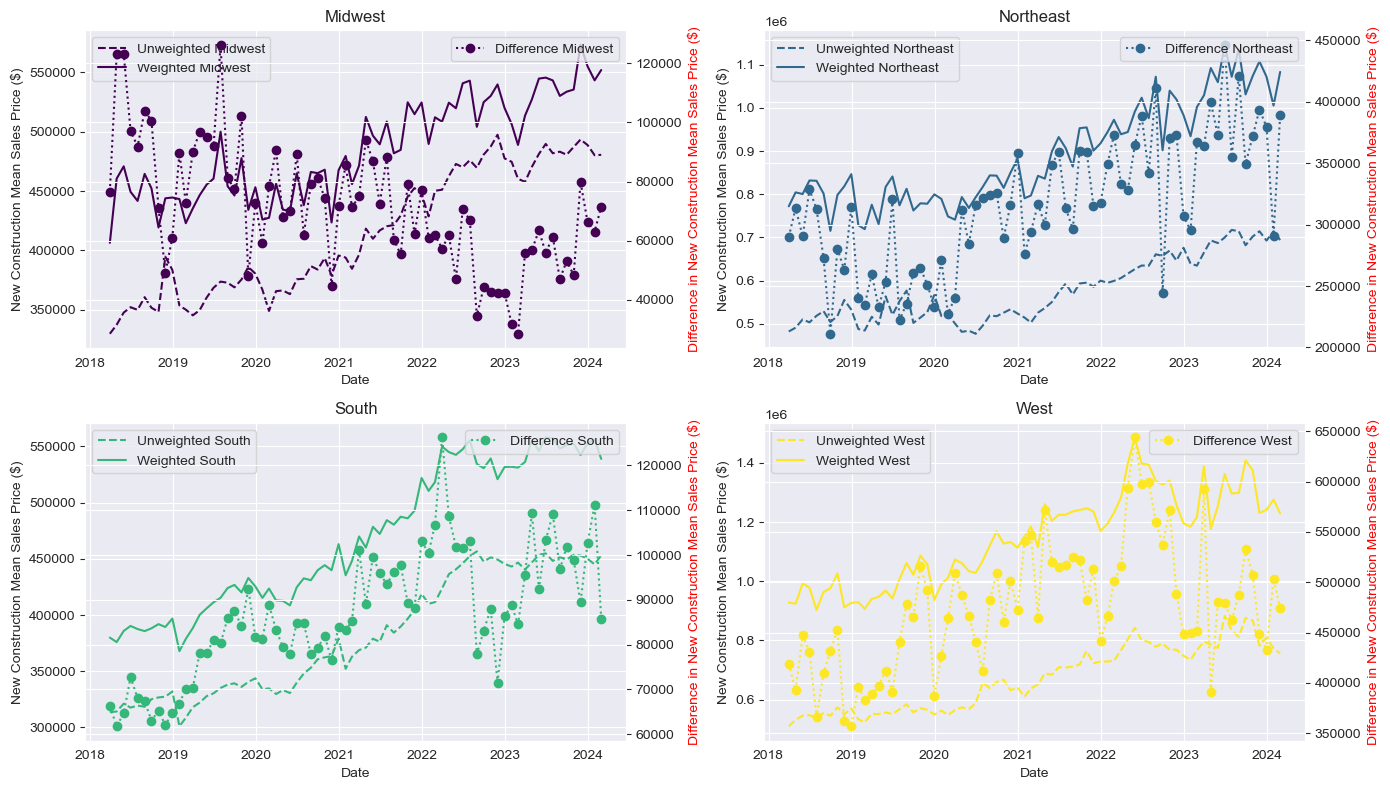

In [33]:
unique_regions = merged_weight_and_nweight['region'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_regions)))
color_dict = dict(zip(unique_regions, colors))
n_subplots = len(unique_regions)
n_cols = 2 
n_rows = (n_subplots + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten() 
for i, region in enumerate(unique_regions):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    region_data = merged_weight_and_nweight[merged_weight_and_nweight['region'] == region]
    ax1.plot(region_data['datecol'], region_data['new construction mean sales price ($)'], label='Unweighted ' + region, color=color_dict[region], linestyle='--')
    ax1.plot(region_data['datecol'], region_data['w_new construction mean sales price ($)'], label='Weighted ' + region, color=color_dict[region], linestyle='-')
    difference = region_data['new_con_sales_diff']
    ax2.plot(region_data['datecol'], difference, label='Difference ' + region, color=color_dict[region], linestyle=':', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('New Construction Mean Sales Price ($)')
    ax2.set_ylabel('Difference in New Construction Mean Sales Price ($)', color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title(region)
fig.tight_layout()

plt.show()

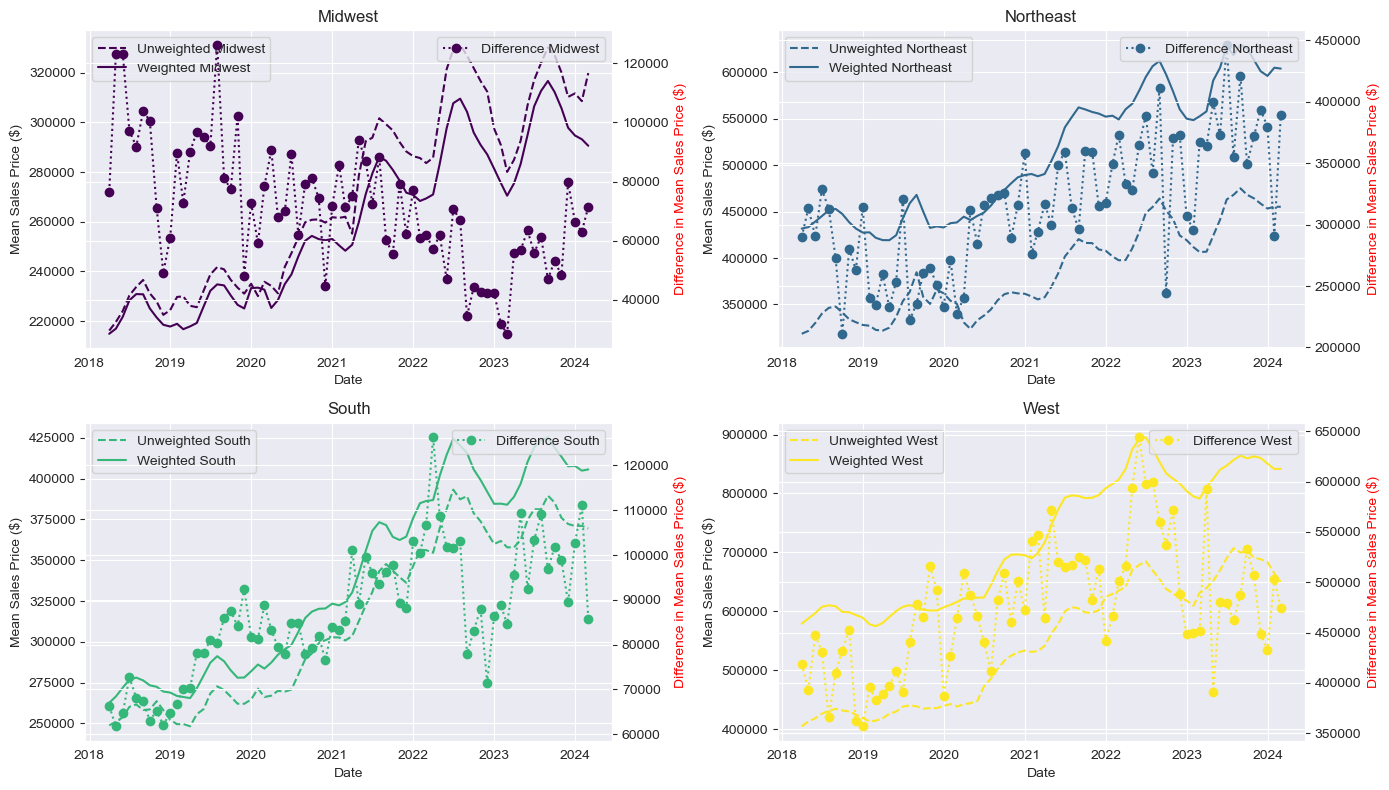

In [34]:
unique_regions = merged_weight_and_nweight['region'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_regions)))
color_dict = dict(zip(unique_regions, colors))
n_subplots = len(unique_regions)
n_cols = 2 
n_rows = (n_subplots + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten() 
for i, region in enumerate(unique_regions):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    region_data = merged_weight_and_nweight[merged_weight_and_nweight['region'] == region]
    ax1.plot(region_data['datecol'], region_data['mean sales price ($)'], label='Unweighted ' + region, color=color_dict[region], linestyle='--')
    ax1.plot(region_data['datecol'], region_data['w_mean sales price ($)'], label='Weighted ' + region, color=color_dict[region], linestyle='-')
    difference = region_data['new_con_sales_diff']
    ax2.plot(region_data['datecol'], difference, label='Difference ' + region, color=color_dict[region], linestyle=':', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Mean Sales Price ($)')
    ax2.set_ylabel('Difference in Mean Sales Price ($)', color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title(region)
fig.tight_layout()

plt.show()

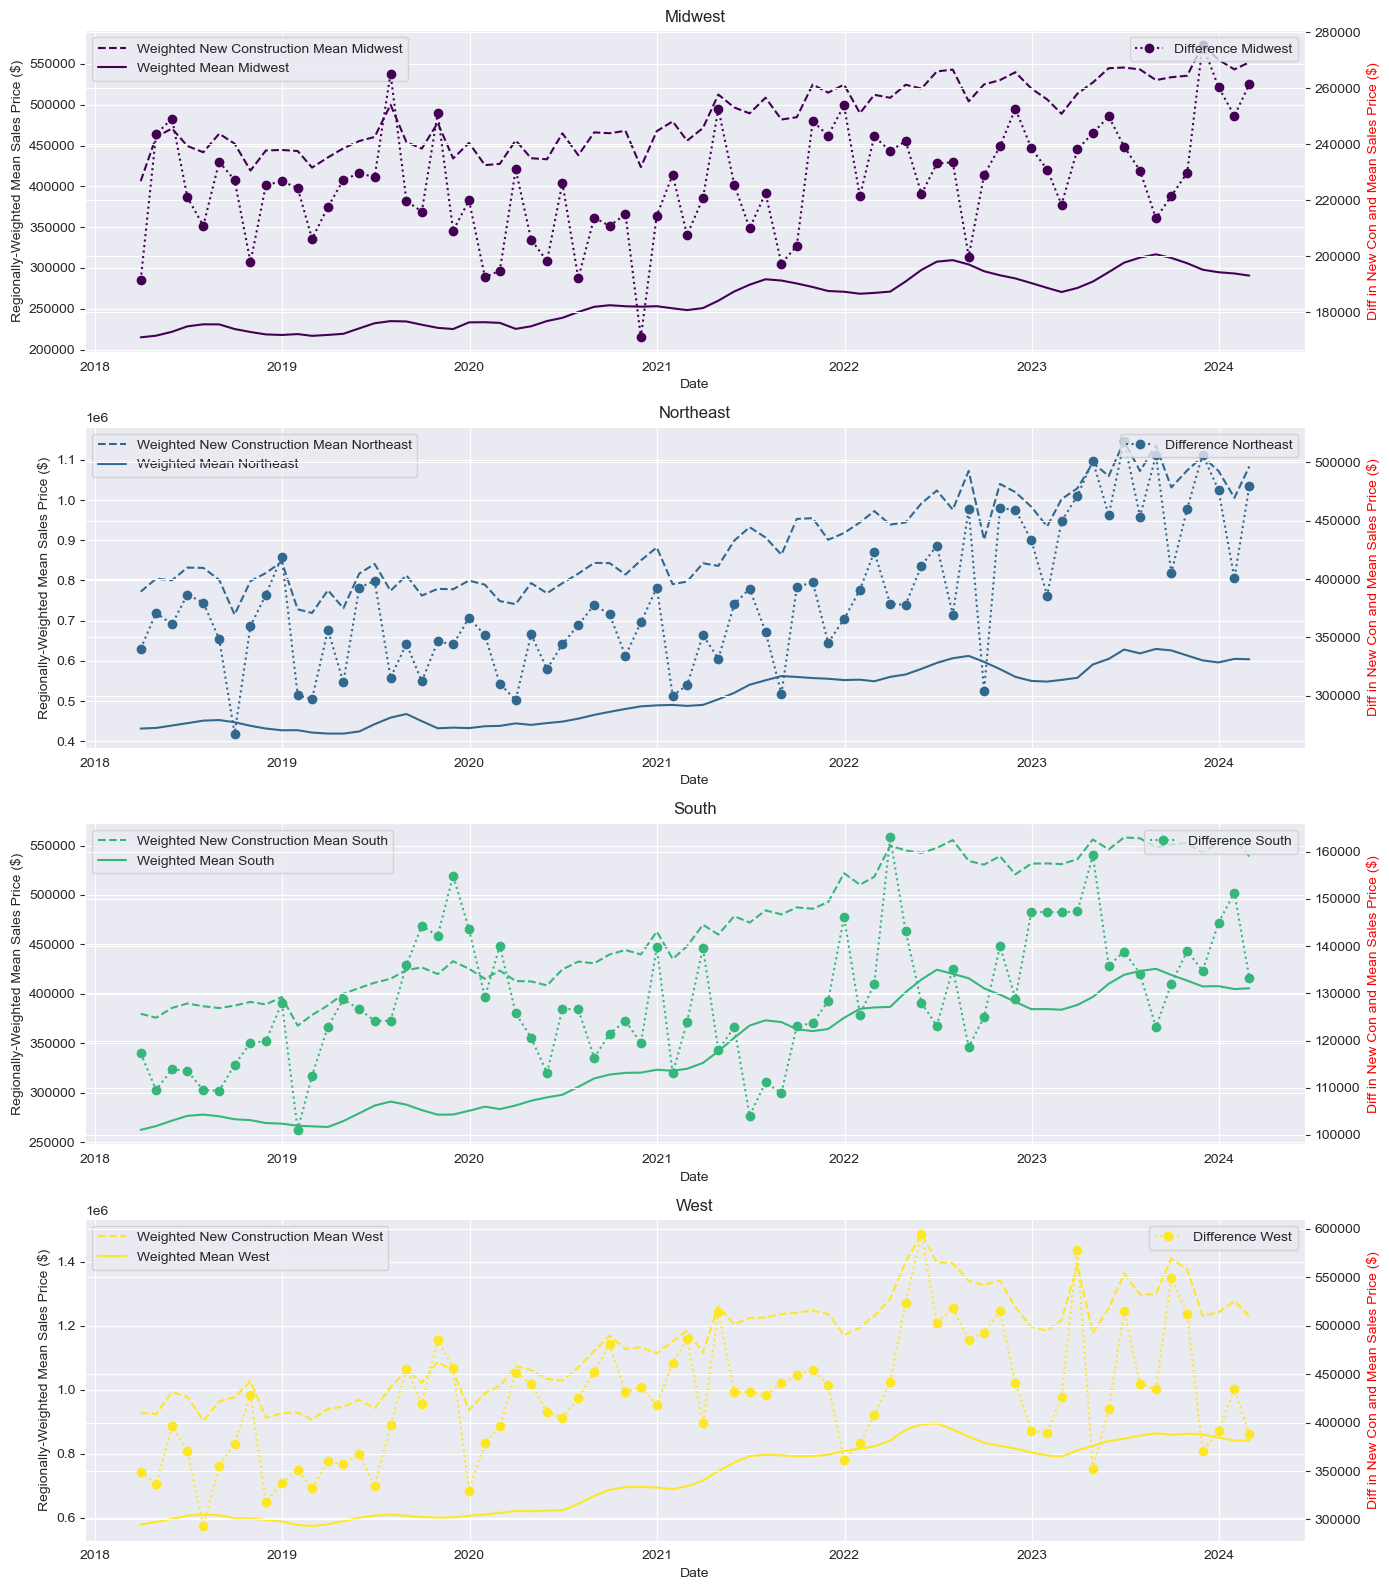

In [39]:
unique_regions = merged_weight_and_nweight['region'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_regions)))
color_dict = dict(zip(unique_regions, colors))
n_subplots = len(unique_regions)
n_cols = 1
n_rows = (n_subplots + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten() 
for i, region in enumerate(unique_regions):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    region_data = merged_weight_and_nweight[merged_weight_and_nweight['region'] == region]
    ax1.plot(region_data['datecol'], region_data['w_new construction mean sales price ($)'], label='Weighted New Construction Mean ' + region, color=color_dict[region], linestyle='--')
    ax1.plot(region_data['datecol'], region_data['w_mean sales price ($)'], label='Weighted Mean ' + region, color=color_dict[region], linestyle='-')
    difference = region_data['w_new construction mean sales price ($)'] - region_data['w_mean sales price ($)']
    ax2.plot(region_data['datecol'], difference, label='Difference ' + region, color=color_dict[region], linestyle=':', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Regionally-Weighted Mean Sales Price ($)')
    ax2.set_ylabel('Diff in New Con and Mean Sales Price ($)', color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title(region)
fig.tight_layout()

plt.show()